In [75]:
library(tidyverse)
library(tidymodels)
library(GGally)

In [76]:
players_url <- "https://raw.githubusercontent.com/NelsonJYLee/dsci100-project/refs/heads/main/data/players.csv"
sessions_url <- "https://raw.githubusercontent.com/NelsonJYLee/dsci100-project/refs/heads/main/data/sessions.csv"

In [77]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [78]:
players <- read_csv(players_url)
nrow(players)
ncol(players)

played_hours_summary <- players |>
    summarize(
        min_hours = min(played_hours, na.rm = TRUE),
        max_hours = max(played_hours, na.rm = TRUE),
        mean_hours = mean(played_hours, na.rm = TRUE),
        median_hours = median(played_hours, na.rm = TRUE),
        sd_hours = sd(played_hours, na.rm = TRUE)
      )

age_summary <- players |>
  summarize(
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE)
  )

experience_summary <- players |>
    group_by(experience) |>
    summarize(count = n()) |>
    mutate(percent = count/sum(count) * 100)

subscribe_summary <- players |>
    group_by(subscribe) |>
    summarize(count = n()) |>
    mutate(percent = count/sum(count) * 100)

gender_summary <- players |>
    group_by(gender) |>
    summarize(count = n()) |>
    mutate(percent = count/sum(count) * 100) 

played_hours_summary
age_summary
experience_summary
subscribe_summary
gender_summary

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196

[1] 7

min_hours,max_hours,mean_hours,median_hours,sd_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,223.1,5.845918,0.1,28.35734


min_age,max_age,mean_age,median_age,sd_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.13918,19,7.389687


experience,count,percent
<chr>,<int>,<dbl>
Amateur,63,32.142857
Beginner,35,17.857143
Pro,14,7.142857
Regular,36,18.367347
Veteran,48,24.489796


subscribe,count,percent
<lgl>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


gender,count,percent
<chr>,<int>,<dbl>
Agender,2,1.0204082
Female,37,18.8775510
Male,124,63.2653061
Non-binary,15,7.6530612
Other,1,0.5102041
Prefer not to say,11,5.6122449
Two-Spirited,6,3.0612245


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


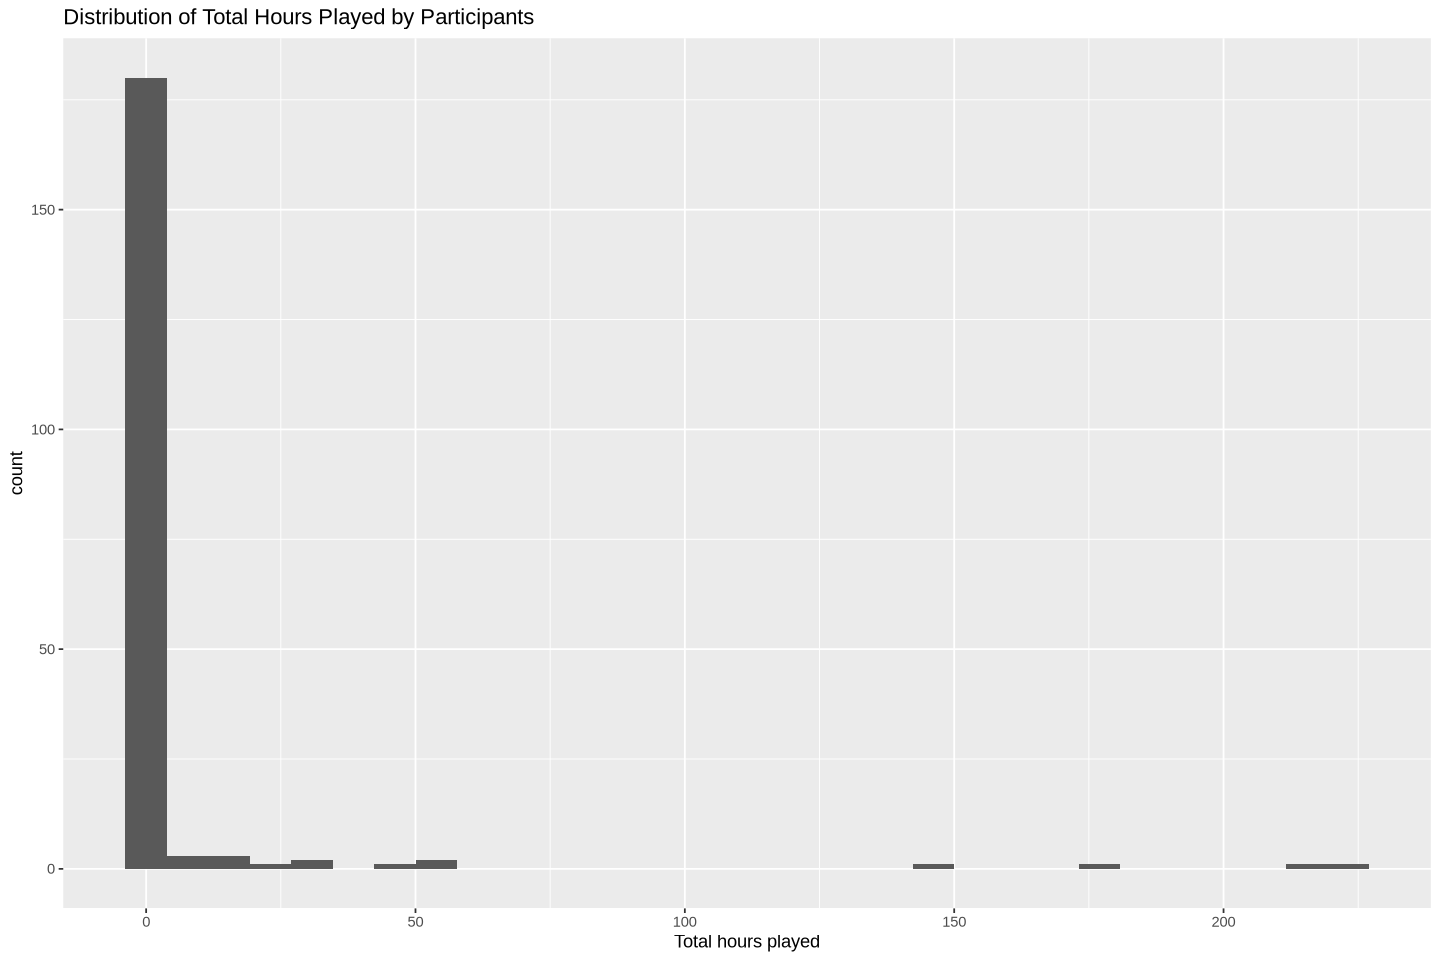

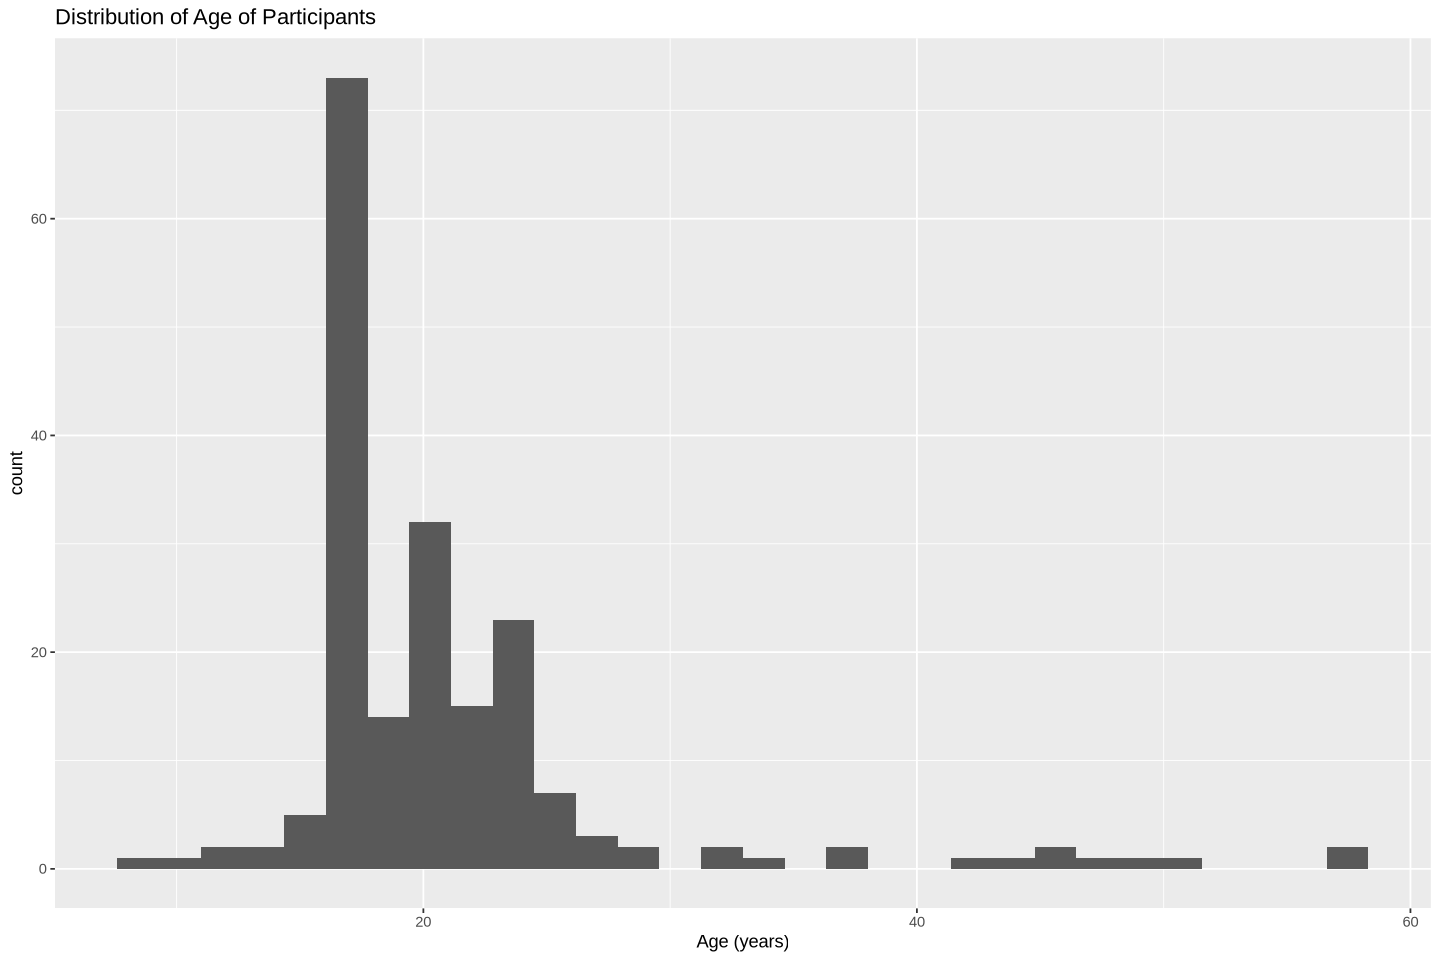

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


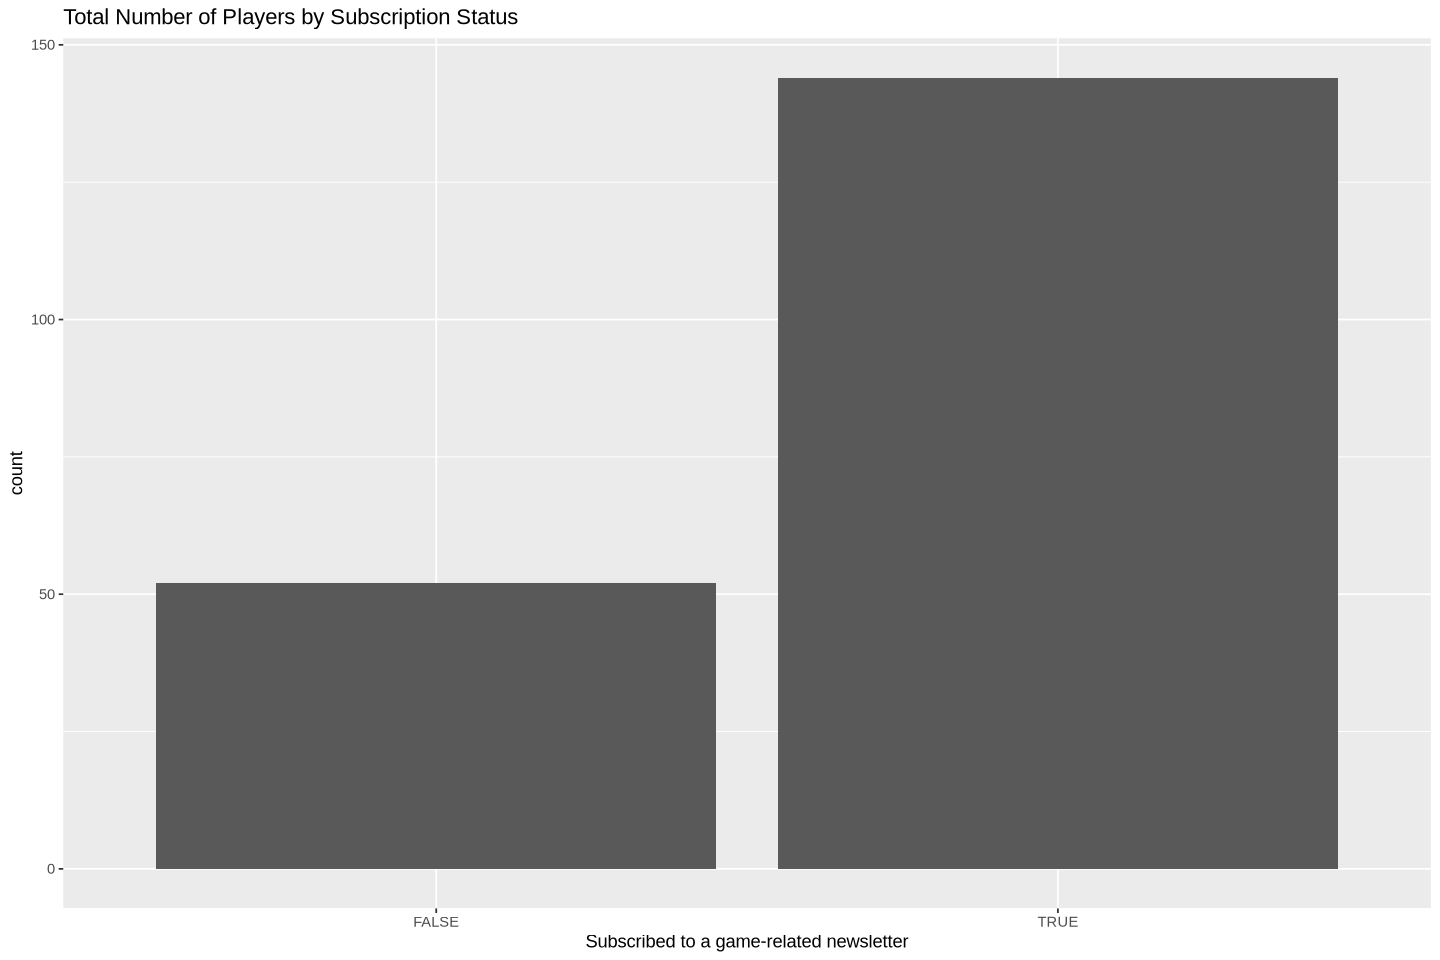

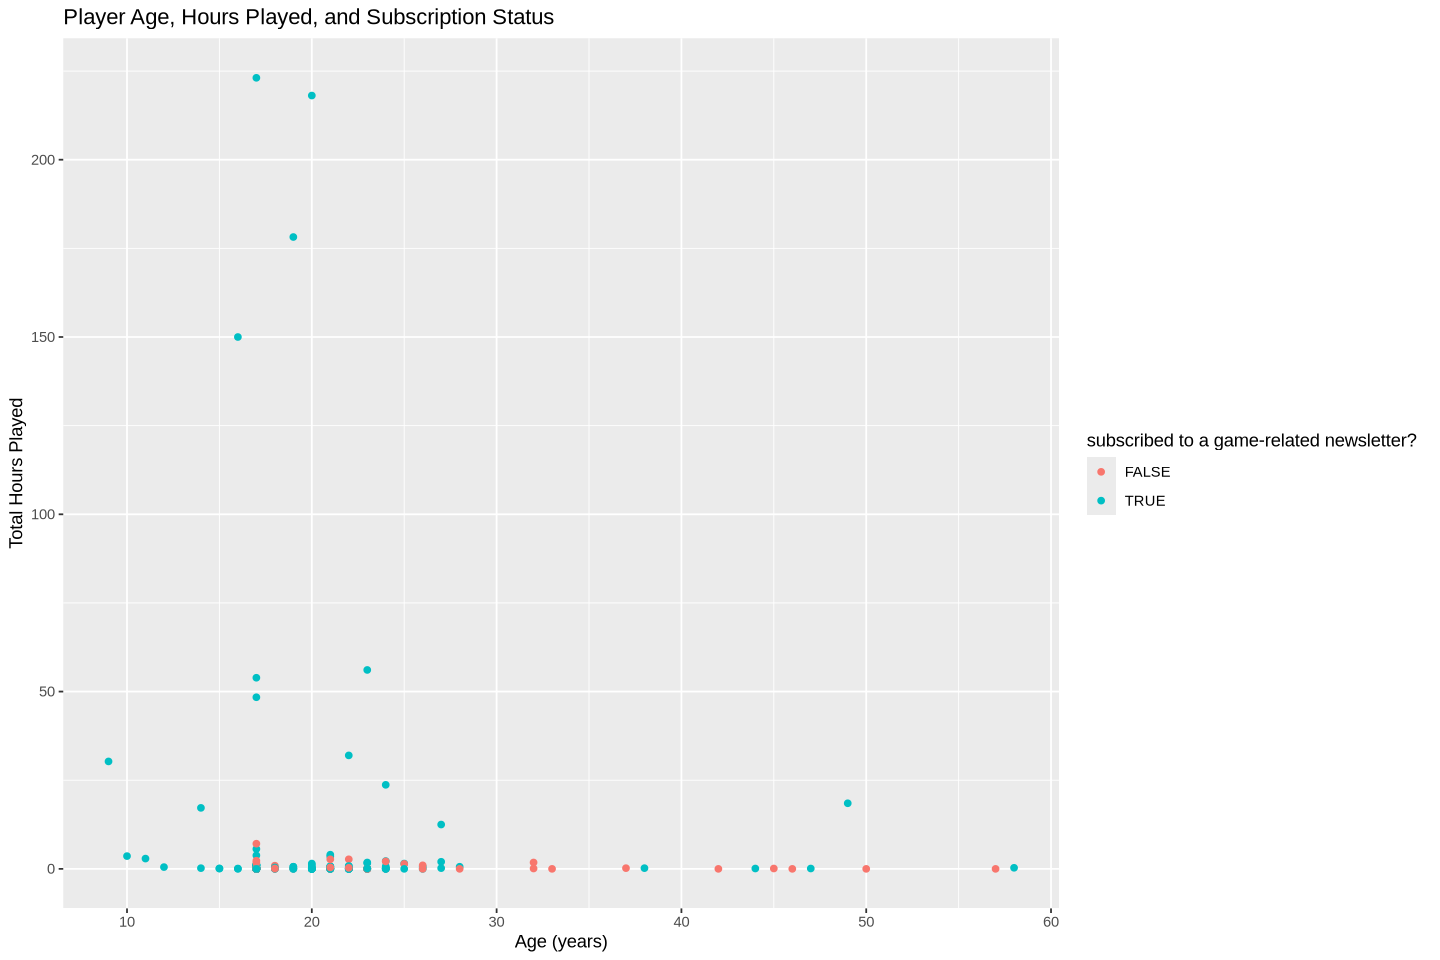

In [106]:
hours_plot <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram() +
    labs(title = "Distribution of Total Hours Played by Participants", x = "Total hours played")

age_plot <- players |>
    ggplot(aes(x = Age)) +
    geom_histogram() +
    labs(title = "Distribution of Age of Participants", x = "Age (years)")

subscribe_plot <- players |>
    ggplot(aes(x = subscribe)) +
    geom_bar() +
    labs(title = "Total Number of Players by Subscription Status", x = "Subscribed to a game-related newsletter", y = "count")


players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(title = "Player Age, Hours Played, and Subscription Status", x = "Age (years)", y = "Total Hours Played", color = "subscribed to a game-related newsletter?")

hours_plot
age_plot
subscribe_plot
players_plot

In [80]:
sessions <- read_csv(sessions_url)
nrow(sessions)
ncol(sessions)

sessions_hashedEmail_summary <- sessions |>
    group_by(hashedEmail) |>
    summarize(count = n())

sessions_num_summary <- sessions_hashedEmail_summary |>
    summarize(
        min_sessions = min(count, na.rm = TRUE),
        max_sessions = max(count, na.rm = TRUE),
        mean_sessions = mean(count, na.rm = TRUE),
        median_sessions = median(count, na.rm = TRUE),
        sd_sessions = sd(count, na.rm = TRUE))

original_start_time_summary <- sessions |>
    summarize(
        min_start = min(original_start_time, na.rm = TRUE),
        max_start = max(original_start_time, na.rm = TRUE),
        mean_start = mean(original_start_time, na.rm = TRUE),
        median_start = median(original_start_time, na.rm = TRUE),
        sd_start = sd(original_start_time, na.rm = TRUE))

original_end_time_summary <- sessions |>
    summarize(
        min_end = min(original_end_time, na.rm = TRUE),
        max_end = max(original_end_time, na.rm = TRUE),
        mean_end = mean(original_end_time, na.rm = TRUE),
        median_end = median(original_end_time, na.rm = TRUE),
        sd_end = sd(original_end_time, na.rm = TRUE))

hashedEmail_summary
original_start_time_summary
original_end_time_summary

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1535

[1] 5

min_sessions,max_sessions,mean_sessions,median_sessions,sd_sessions
<int>,<int>,<dbl>,<int>,<dbl>
1,310,12.28,1,41.3269


min_start,max_start,mean_start,median_start,sd_start
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.72733e+12,1.719201e+12,1.7192e+12,3557491589


min_end,max_end,mean_end,median_end,sd_end
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.72734e+12,1.719196e+12,1.71918e+12,3552813134


# Data Description

## Players file
- consists of 196 observations and 7 variables
- variables: experience, subscribe,	hashedEmail, played_hours, name, gender, Age
- name and hashedEmail are are mostly unique categorical varibles and not useful to summarize

### Quantitative Variables Summary
| Variable    | Description               | Mean     | SD     | Min    | Max     | Median  |
|-------------|---------------------------|----------|--------|--------|---------|---------|
| played_hours| number of hours played    | 5.85     | 28.36  | 0.00   | 223.10  | 0.10    |
| Age         | age of the player         | 21.14    | 7.39   | 9.00   | 58.00   | 19.00   |

### Categorical Variables Summary
#### Summary of experience
Description of variable: experience with Minecraft
| Experience | Count | Percent |
|------------|-------|---------|
| Amateur    | 63    | 32.14   |
| Beginner   | 35    | 17.86   |
| Pro        | 14    | 7.14    |
| Regular    | 36    | 18.37   |
| Veteran    | 48    | 24.49   |

#### Summary of subscribe
Description of variable: subscribe is true if they are subscribed to a game-related newsletter and false if not
| Subscribe  | Count | Percent |
|------------|-------|---------|
| TRUE       | 144   | 73.47   |
| FALSE      | 52    | 26.53   |

#### Summary of gender
Description of variable: self-claimed gender
| Gender            | Count | Percent |
|-------------------|-------|---------|
| Agender           | 2     | 1.02    |
| Female            | 37    | 18.88   |
| Male              | 124   | 63.27   |
| Non-binary        | 15    | 7.65    |
| Other             | 1     | 0.51    |
| Prefer not to say | 11    | 5.61    |
| Two-Spirited      | 6     | 3.06    |

### Potential Problems with Players file
- Age column has 2 missing values, so we must ignore then when getting Age's statistics
- Age is reported in whole years but has the double type. Should be of type int.

## Sessions file
- consists of 1535 observations and 5 variables
- variables: hashedEmail, start_time, end_time, original_start_time, original_end_time
- start_time and end_time are not useful to summarize, explained below
- original_start_time and original_end_time are not useful to summarize, explained below

### Quantitative Variables Summary
| Variable         | Description                                                | Mean     | SD     | Min    | Max     | Median  |
|------------------|------------------------------------------------------------|----------|--------|--------|---------|---------|
| hashedEmailCount | count of sessions of each unique encrypted email address   | 12.28    | 41.33  | 1.00   | 310.00  | 1.00    |

### Potential Problems with Sessions file
- original_start_time and original_end_time columns are both missing 2 values
- original_start_time and original_end_time are mostly the same value in all observations. The ending decimal places seem to have been rounded off. This means if we try to calculate the sesison duration from original_end_time - original_start_time, we will get a duration of 0 for almost every obsevation (besides a couple)
- start_time and end_time are strings which are unique to the minute, meaning that we cannot immediatley use them to calculate session durations or filter for time periods. We must first convert the strings
- most email addresses are associated with only one playing session, meaning it would be hard to draw conclusions about player behaviour over time


# Question of Interest

- broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- specific: Can the age and Minecraft hours played predict if a player is subscribed to a game-related newsletter?
- The data in players.csv and sessions.csv will help me answer this question by providing me the direct variables needed

In [81]:
(3) Exploratory Data Analysis and Visualization
In this assignment, you will:

Demonstrate that the dataset can be loaded into R.
Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.



ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: (3) Exploratory
        ^
